## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [168]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import re
from datetime import datetime

%matplotlib inline

In [169]:
pd.options.display.max_colwidth=180

In [170]:
#Reading in the twitter-archive-enhanced data into a dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [171]:
#Make a requestto web page for image predictions and check the status (should be 200)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [172]:
#Create a file, 'image_predictions_file' and write the contents of the response to the file
with open('image_predictions_file', mode = 'wb') as file:
    file.write(response.content)

In [173]:
#Create a dataframe from the image_predictions_file file
image_predictions_df = pd.read_csv('image_predictions_file', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [174]:
#Get the keys to authenticate to the Twitter API to access tweets via the Tweepy library
#NOTE: My personal keys are hidden!
api_key = ["api_key"]
api_key_secret = ["api_key_secret"]
bearer_token = ["bearer_token"]
access_token = ["access_token"]
access_secret = ["access_secret"]

In [175]:
#Authenticate and connect to the Tweepy api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [176]:
#Testing the api connection
tweet = api.get_status(892420643555336193, tweet_mode='extended')
tweet.favorite_count, tweet.retweet_count

(33634, 6953)

In [177]:
#Querying the Twitter API for each tweet's JSON data using Python's Tweepy library and 
#Storing each tweet's entire set of JSON data in a file called tweet_json.txt file line by line
tweets, drop_lst = [], []

for i in twitter_archive_df.tweet_id:
    try:
        tweet = api.get_status(i, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        tweets.append(tweet._json)

    except tweepy.TweepError:
        drop_lst.append(i)

with open('tweet_json.txt', 'a',encoding='utf8') as file:
    file.write('\n') # to ensure that the json is on its own line to start
    file.write('\n'.join(json.dumps(tweet) for tweet in tweets)) # this will concatenate the tweets into a newline delimited string

"\n#Querying the Twitter API for each tweet's JSON data using Python's Tweepy library and \n#Storing each tweet's entire set of JSON data in a file called tweet_json.txt file line by line\ntweets, drop_lst = [], []\n\nfor i in twitter_archive_df.tweet_id:\n    try:\n        tweet = api.get_status(i, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)\n        tweets.append(tweet._json)\n\n    except tweepy.TweepError:\n        drop_lst.append(i)\n\nwith open('tweet_json.txt', 'a',encoding='utf8') as file:\n    file.write('\n') # to ensure that the json is on its own line to start\n    file.write('\n'.join(json.dumps(tweet) for tweet in tweets)) # this will concatenate the tweets into a newline delimited string\n"

In [178]:
#Reading the 'tweet_json.txt' data into a dataframe
tweet_info_df = pd.read_json('tweet_json.txt',lines=True,orient='columns')

In [179]:
#Subsetting the dataframe for only the columns required for further analysis
tweet_info_df = tweet_info_df[['id', 'favorite_count', 'retweet_count']]

In [180]:
tweet_info_df.shape

(2327, 3)

In [181]:
tweet_info_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,33674,6964
1,892177421306343426,29214,5269
2,891815181378084864,21963,3463
3,891689557279858688,36768,7190
4,891327558926688256,35161,7710


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing the the twitter_archive_df

In [182]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [183]:
twitter_archive_df.shape, twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

((2356, 17), None)

In [184]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [185]:
twitter_archive_df.dropna(subset=['retweeted_status_id', 'retweeted_status_user_id']).shape

(181, 17)

In [186]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [187]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [188]:
twitter_archive_df[twitter_archive_df.rating_denominator != 10].sort_values(by = 'rating_denominator').shape

(23, 17)

In [189]:
twitter_archive_df[twitter_archive_df.rating_numerator == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [190]:
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [191]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [192]:
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [193]:
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [194]:
twitter_archive_df.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [195]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [196]:
twitter_archive_df[twitter_archive_df.tweet_id == 817777686764523521]['text']

460    This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Name: text, dtype: object

### Assessing image_predictions_df

In [197]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [198]:
image_predictions_df.shape, image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


((2075, 12), None)

In [199]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [200]:
retweets_list = [twitter_archive_df.dropna(subset=['retweeted_status_id', 'retweeted_status_user_id']).tweet_id]

In [201]:
image_predictions_df[image_predictions_df['tweet_id'].isin(retweets_list[0])].shape

(81, 12)

In [202]:
#No dog image
image_predictions_df[(image_predictions_df['p1_dog'] == False) & (image_predictions_df['p2_dog'] == False) & (image_predictions_df['p3_dog'] == False)].shape

(324, 12)

### Assessing tweet_info_df

In [203]:
tweet_info_df

,id,favorite_count,retweet_count
0,892420643555336193,33674,6964
1,892177421306343426,29214,5269
2,891815181378084864,21963,3463
3,891689557279858688,36768,7190
4,891327558926688256,35161,7710
5,891087950875897856,17734,2583
6,890971913173991426,10324,1646
7,890729181411237888,56627,15670
8,890609185150312448,24406,3602
9,890240255349198849,27832,6064


In [204]:
tweet_info_df.shape, tweet_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


((2327, 3), None)

In [205]:
tweet_info_df.describe()

,id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7022.910615,2457.306833
std,6.820795e+16,10912.946912,4160.865231
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1218.500000,492.500000
50%,7.178418e+17,3035.000000,1143.000000
75%,7.986547e+17,8561.000000,2844.000000
max,8.924206e+17,144149.000000,70270.000000


In [206]:
#Confirming no duplications
tweet_info_df.id.duplicated().sum()

0

### Quality issues
- 181 Retweets exist in twitter_archive_df (where 'retweeted_status_id' and 'retweeted_status_user_id' columns are not null)
- 78 Tweets are replies and not original tweets in twitter_archive_df
- Some rows do not have a doc category at all
- Some dogs are categorized in more than one dog stage
- 23 ratings have a rating_denominator that is not equal to 10 (all ratings should be out of 10)
- Some rows have very large (outlier) rating numerators
- Some tweets with decimal rating numerators only considered the digits after the decimal resulting in incorrect ratings
- Nulls represented as "None" (values) in twitter_archive_df columns: name, doggo, floofer, pupper, puppo
- Some of the columns are nolonger required after cleaning the twitter_archive_df and image_predictions_df
- 81 Retweets exist in image_predictions_df
- 324 entries do not have a dog image in image_predictions_df
- tweet_info_df does not return retweet_count and favorite_count for tweets that may have been deleted or suspended by Twitter

### Tidiness issues
- Timestamp column holds more than one variable (i.e. year, month, date, hour, minute, seconds) in twitter_archive_df

- Dog stages variables (doggo, floofer, pupper, pupper, puppo) used as column names

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [207]:
# Make copies of original pieces of data
archive_copy = twitter_archive_df.copy()
predictions_copy = image_predictions_df.copy()
info_copy = tweet_info_df.copy()

### Quality issues

### Issue

#### Define:
Remove the the 181 retweets from the archive_copy dataframe

#### Code

In [208]:
#Get list of tweet_ids that are retweets
retweet_ids = list(archive_copy.dropna(subset=['retweeted_status_id', 'retweeted_status_user_id']).tweet_id)
#Exclude all tweet_ids that are in the retweet_ids list
archive_copy = archive_copy[~archive_copy['tweet_id'].isin(retweet_ids)]

#### Test

In [209]:
#Confirm that there are nolonger tweets with 'retweeted_status_id' and 'retweeted_status_user_id' values (i.e., no retweets)
archive_copy.dropna(subset=['retweeted_status_id', 'retweeted_status_user_id']).tweet_id

Series([], Name: tweet_id, dtype: int64)

### Issue

#### Define
Remove the 78 replies from the archive_copy dataframe

#### Code

In [210]:
#Get list of tweet_ids that are replies
reply_ids = list(archive_copy.dropna(subset=['in_reply_to_status_id', 'in_reply_to_user_id']).tweet_id)
#Exclude all tweet_ids that are in the reply_ids list
archive_copy = archive_copy[~archive_copy['tweet_id'].isin(reply_ids)]

#### Test

In [211]:
#Confirm that there are nolonger tweets with 'in_reply_to_status_id' and 'in_reply_to_user_id' values (i.e., no replies)
archive_copy.dropna(subset=['in_reply_to_status_id', 'in_reply_to_user_id']).tweet_id

Series([], Name: tweet_id, dtype: int64)

### Issue

#### Define:

There are multiple rating_numerator issues that will be addressed in this section, these include:
- Rating_numerators with decimals not being read correctly. Only the digits after the decimal were read as the rating_numerator
- Incorrect figures in the text selected as the rating
- Some ratings are too large or too small (outliers) and will be investigated and corrected where necessary

#### Code

In [212]:
#Just taking a look at some of the possible issues that I picked through visual assessment
rating_issues_df = archive_copy[(archive_copy.rating_denominator != 10) | (archive_copy.rating_numerator > 19) | (archive_copy.rating_numerator < 10)][['tweet_id', 'text','rating_numerator', 'rating_denominator']]

In [213]:
rating_issues_df

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
814,771014301343748096,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7,10


In [214]:
rating_issues_df.shape[0]

437

In [215]:
#Subset records where the denominator = 10
denom_10_df = archive_copy[archive_copy.rating_denominator == 10]

In [216]:
denom_10_df.shape

(2080, 17)

In [217]:
#Creating a temp column to help in the process to extract the true rating - Regex operations will be used
denom_10_df['temp'] = denom_10_df['text'].str.split(r"/10", expand=True)[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [218]:
#Step 2 in extracting the rating_numerator with regex
denom_10_df['rating_numerator'] = round(denom_10_df['temp'].str.split(" ").str[-1].str.extract('(\d+\.{0,1}\d{0,2})', expand=False).astype(float), 0).astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
# Dataframe with the correct rating_numerator, where rating_denominator = 10
denom_10_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,temp
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal. 13
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12"
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner 

In [220]:
#Dropping the 'temp' column used to store intermediate cleaning results
denom_10_df.drop('temp', axis=1, inplace=True)

#Confirming operation successful - 'temp' nolonger exist
denom_10_df.columns

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Test

In [221]:
#Confirm the range of rating numerators for tweets with a rating_denominator = 10
denom_10_df.rating_numerator.value_counts()

12      486
10      438
11      415
13      287
9       152
8        98
7        51
14       39
5        33
6        32
3        19
4        15
2         8
1         4
420       1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [222]:
#Confirming the 2 outlier ratings of 420 and 1776
denom_10_df[denom_10_df.rating_numerator.isin([420,1776])]

#As can be seen below, both of these are genuine ratings, so no cleaning will be done

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


### Issue

#### Define:
Look for the correct rating denominator (10) in the tweet text and update incorrect rating_denominator values. The rating numerator for these tweets will also be updated at the same time.

The approach for resolving this issue will involve both programmatic assessment(subsetting the archive_copy dataframe for only tweets where the rating_denominator is NOT equal to 10 and then visual assessment the text to get the correct rating figures.

In some cases this may involve just getting the correct rating figures, while is other cases it will involve normalising the rating_numerator and rating denominator to rating_denominator of 10.

#### Code

In [223]:
#Subset a dataframe with rating_denominator that is not equal to 10
#Get the index of the records
denom_other_df = archive_copy[archive_copy.rating_denominator != 10]
denom_other_df.index

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')

In [224]:
#Code to view tweet for agiven index
archive_copy.loc[2335,:]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [225]:
#Updating the rating_numerator and rating_denominator for the index
denom_other_df.loc[433, ['rating_numerator', 'rating_denominator']] = [12, 10] #Normalized from the given rating of 84/70
denom_other_df.loc[516, ['rating_numerator', 'rating_denominator']] = [34, 10] #Normalized from 24/7 (an assumed rating)
denom_other_df.loc[902, ['rating_numerator', 'rating_denominator']] = [11, 10] #Normalised from 165/150 
denom_other_df.loc[1068, ['rating_numerator', 'rating_denominator']] = [14, 10] #Found in the text
denom_other_df.loc[1120, ['rating_numerator', 'rating_denominator']] = [12, 10] #Normalised from 204/170
denom_other_df.loc[1165, ['rating_numerator', 'rating_denominator']] = [13, 10] #Found in the text
denom_other_df.loc[1202, ['rating_numerator', 'rating_denominator']] = [11, 10] #Found in the text
denom_other_df.loc[1228, ['rating_numerator', 'rating_denominator']] = [11, 10] #Normalised from 99/90
denom_other_df.loc[1254, ['rating_numerator', 'rating_denominator']] = [10, 10] #Normalised from 80/80
denom_other_df.loc[1274, ['rating_numerator', 'rating_denominator']] = [9, 10] #Normalised from 45/50
denom_other_df.loc[1351, ['rating_numerator', 'rating_denominator']] = [12, 10] #Normalised from 60/50
denom_other_df.loc[1433, ['rating_numerator', 'rating_denominator']] = [11, 10] #Normalised from 44/40
denom_other_df.loc[1635, ['rating_numerator', 'rating_denominator']] = [11, 10] #Normalised from 121/110
denom_other_df.loc[1662, ['rating_numerator', 'rating_denominator']] = [10, 10] #Found in the text
denom_other_df.loc[1779, ['rating_numerator', 'rating_denominator']] = [12, 10] #Normalised from 144/120
denom_other_df.loc[1843, ['rating_numerator', 'rating_denominator']] = [10, 10] #Normalised from 80/80
denom_other_df.loc[2335, ['rating_numerator', 'rating_denominator']] = [9, 10] #Found in the text

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test

In [226]:
#Confirming that raring_numerator and rating_denominator have updated
denom_other_df[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
433,12,10
516,34,10
902,11,10
1068,14,10
1120,12,10
1165,13,10
1202,11,10
1228,11,10
1254,10,10
1274,9,10


#### Code

This section recombines the two dataframes that were split to faciliate cleaning of ratings where rating_denominator was = 10, and where rating_denominator was NOT = 10. denom_other_df and denom_10_df respectively

In [227]:
#Recombine the two dataframes into one
archive_merge = pd.concat([denom_10_df, denom_other_df], axis=0)

#### Test

In [228]:
archive_merge.shape

(2097, 17)

In [229]:
archive_merge

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [230]:
#Confirm range of rating_numerator values is 'reasonable'
archive_merge.rating_numerator.value_counts()

12      490
10      441
11      420
13      288
9       154
8        98
7        51
14       40
5        33
6        32
3        19
4        15
2         8
1         4
34        1
420       1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [231]:
#Confirm all rating_denominator values = 10
archive_merge.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Issue

#### Define:
Update all "None" values in the 'doggo', 'floofer', 'pupper', 'puppo' columns to NaNs

#### Code

In [232]:
#Replace 'None' with np.nan
archive_merge.replace('None', np.nan, inplace=True)

#### Test

In [233]:
#Confirm columns now show representative number of nulls
archive_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2335
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: float64(5), int64(3), object(9)
memory

In [234]:
#Confirm 'None' is not a value in column
archive_merge['doggo'].value_counts()

doggo    83
Name: doggo, dtype: int64

In [235]:
#Confirm 'None' is not a value in column
archive_merge['floofer'].value_counts()

floofer    10
Name: floofer, dtype: int64

In [236]:
#Confirm 'None' is not a value in column
archive_merge['pupper'].value_counts()

pupper    230
Name: pupper, dtype: int64

In [237]:
#Confirm 'None' is not a value in column
archive_merge['puppo'].value_counts()

puppo    24
Name: puppo, dtype: int64

### Issue

#### Define:
Review dogs categorized in more than one stage and remove the incorrect category

#### Code

In [238]:
#Create a new column that stores the count of dog stages each record is categorised into
archive_merge['stage_count'] = archive_merge[['doggo', 'floofer', 'pupper', 'puppo']].count(axis=1)

In [239]:
#How many records are categorised in more than 1 stage?
archive_merge[archive_merge.stage_count > 1].shape[0]

11

In [240]:
#Get the indexes of the 11 records categorised in more than 1 dog stage
archive_merge[archive_merge.stage_count > 1]['stage_count'].index

Int64Index([191, 200, 460, 531, 575, 705, 733, 889, 956, 1063, 1113], dtype='int64')

Selecting the dog stage that a dog should be categorised in is a subjective exercise where I go throught the text of the tweet and make a judgement call on which category I feel is the correct one.

In [241]:
#Update the 'incorrect' category to np.nan
archive_merge.loc[191, ['doggo']] = np.NaN #Set incorrect category to null
archive_merge.loc[200, ['doggo']] = np.NaN #Set incorrect category to null
archive_merge.loc[460, ['doggo']] = np.NaN #Set incorrect category to null
archive_merge.loc[531, ['doggo']] = np.NaN #There are two dods in the photo. Keep the first only and set second category to null
archive_merge.loc[575, ['doggo']] = np.NaN #Set incorrect category to null 
archive_merge.loc[705, ['pupper']] = np.NaN #Set incorrect category to null
archive_merge.loc[733, ['doggo']] = np.NaN #There are two dods in the photo. Keep the first only and set second category to null
archive_merge.loc[889, ['pupper']] = np.NaN #There are two dods in the photo. Keep the first only and set second category to null
archive_merge.loc[956, ['pupper']] = np.NaN #Set incorrect category to null
archive_merge.loc[1063, ['doggo']] = np.NaN #There are two dods in the photo. Keep the first only and set second category to null
archive_merge.loc[1113, ['pupper']] = np.NaN #Set incorrect category to null

#### Test

In [242]:
#Recalculate count of stage types per each row
archive_merge['stage_count'] = archive_merge[['doggo', 'floofer', 'pupper', 'puppo']].count(axis=1)

In [243]:
#Confirm that no record has more than 1 dog stage count now
archive_merge[archive_merge.stage_count > 1].shape[0]

0

### Issue

#### Define:
Subset the archive_copy dataframe for only the columns that are still required for analysis i.e, drop unnecessary columns like those left with only nulls after retweets and replies were removed from the dataset.

#### Code

In [244]:
archive_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,0


In [245]:
#Check out the list of all columns
archive_merge.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'stage_count'],
      dtype='object')

In [246]:
#Drop columns nolonger required for further analysis
archive_merge = archive_merge.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','stage_count', 'expanded_urls'], axis=1)

#### Test

In [247]:
#A preview of how the new dataframe looks like
archive_merge.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,NaN


In [248]:
#List of columns after dropping the columns not required
archive_merge.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue
Remove the retweets and replies from the predictions_copy dataframe

#### Define:

This step involves dropping predictions from the predictions_copy dataframe who tweet_ids where dropped from the archive_copy (now archive_merge) dataframe in an earlier section of this notebook.

I will combine the lists for retweet_ids and reply_ids and drop records from the predictions_copy dataframe where tweet_id is in the combined list.

#### Code

In [249]:
#Number of tweet_ids to be dropped
len(retweet_ids), len(reply_ids)

(181, 78)

In [250]:
#combine the two lists
retweet_ids.extend(reply_ids)

In [251]:
#Confirm length of extended list
len(retweet_ids)

259

In [252]:
#Confirm current shape of predictions_copy dataframe
predictions_copy.shape

(2075, 12)

In [253]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [254]:
#Confirm tweet_ids to be dropped = 104
predictions_copy.tweet_id.isin(retweet_ids).sum()

104

In [255]:
#Only keep records that have tweet_ids that are not in the list of tweet_ids to be dropped
predictions_copy = predictions_copy[~predictions_copy.tweet_id.isin(retweet_ids)]

#### Test

In [256]:
#A total of 104 records were dropped
predictions_copy.shape

(1971, 12)

In [257]:
#Confrim tweet_ids have been dropped
predictions_copy.tweet_id.isin(retweet_ids).sum()

0

### Issue

#### Define:
- Take the highest confidence prediction that is a dog as the confirmed dog type and drop all other predictions
- For dogs that do not have an image predicition that is a dog then do not give them a prediction

#### Code

In [258]:
predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [259]:
#Create dataframe of the p1 images
p1_df = predictions_copy[['tweet_id', 'p1', 'p1_dog', 'p1_conf']].rename({'p1': 'dog_type', 'p1_dog':'is_dog', 'p1_conf': 'conf'}, axis=1)

In [260]:
#Create dataframe of the p2 images
p2_df = predictions_copy[['tweet_id', 'p2', 'p2_dog', 'p2_conf']].rename({'p2': 'dog_type', 'p2_dog':'is_dog', 'p2_conf': 'conf'}, axis=1)

In [261]:
#Create dataframe of the p3 images
p3_df = predictions_copy[['tweet_id', 'p3', 'p3_dog', 'p3_conf']].rename({'p3': 'dog_type', 'p3_dog':'is_dog', 'p3_conf': 'conf'}, axis=1)

In [262]:
#Confirm number of records in each dataframe
p1_df.shape[0], p2_df.shape[0], p3_df.shape[0]

(1971, 1971, 1971)

In [263]:
#Combine all 3 dataframes into 1
predictions_merged = pd.concat([p1_df, p2_df, p3_df])

In [264]:
#Confirm all 3 dataframes are merged
predictions_merged.shape

(5913, 4)

In [265]:
#Check True vs False (i.e, image predictions that are dogs versus those that are not)
predictions_merged.is_dog.value_counts()

True     4374
False    1539
Name: is_dog, dtype: int64

In [266]:
#Drop all records where "is_dog" = False
predictions_merged = predictions_merged[predictions_merged.is_dog != False]

In [267]:
#Confirm all non-Dog image predictions have been dropped
predictions_merged.is_dog.value_counts()

True    4374
Name: is_dog, dtype: int64

In [268]:
predictions_merged.head()

,tweet_id,dog_type,is_dog,conf
0,666020888022790149,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,redbone,True,0.506826
2,666033412701032449,German_shepherd,True,0.596461
3,666044226329800704,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,miniature_pinscher,True,0.560311


In [269]:
#Confirm data types can be sorted
predictions_merged.dtypes

tweet_id      int64
dog_type     object
is_dog         bool
conf        float64
dtype: object

In [270]:
#Sort each tweet dog predictions by the highest confidence and drop the other lower confidence predictions
predictions_merged = predictions_merged.sort_values(['tweet_id', 'conf'], ascending=[True, False]).drop_duplicates(subset='tweet_id', keep='first')

In [271]:
# Drop columns nolonger required for further analysis
predictions_merged.drop(['conf','is_dog'], axis=1, inplace=True)

#### Test

In [272]:
#A look at the dataframe
predictions_merged

,tweet_id,dog_type
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
5,666050758794694657,Bernese_mountain_dog
7,666055525042405380,chow
8,666057090499244032,golden_retriever
9,666058600524156928,miniature_poodle
10,666063827256086533,golden_retriever


In [273]:
#Confirm number of tweets that have images that are dog predictions
predictions_merged.shape

(1666, 2)

1 666 tweets have images that are predicted to be a dog type

In [274]:
#Check number of records per each dog type in the predictions
predictions_merged.dog_type.value_counts()

golden_retriever                  156
Labrador_retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Siberian_husky                     20
beagle                             20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
basset                             17
Lakeland_terrier                   17
kuvasz      

### Tidiness issues

### Issue

#### Define:
Split out the timestamp column into separate year, month, day, hour, minute, second columns. Each variable in the timestamp should form its own column.

#### Code

In [275]:
# Checking how the timestamp column looks like
archive_merge.timestamp[5]

'2017-07-29 00:08:17 +0000'

In [276]:
#Convert timestamp column from string to datetime dtype
archive_merge['timestamp'] = pd.to_datetime(archive_merge['timestamp'])

In [277]:
#Create a year column
archive_merge['year'] = archive_merge['timestamp'].dt.year

In [278]:
#Create a month column
archive_merge['month'] = archive_merge['timestamp'].dt.month

In [279]:
#Create a day column
archive_merge['day'] = archive_merge['timestamp'].dt.day

In [280]:
#Create a weekday column
archive_merge['weekday'] = archive_merge['timestamp'].dt.weekday

In [281]:
#Create an hour column
archive_merge['hour'] = archive_merge['timestamp'].dt.hour

In [282]:
#Create a minute column
archive_merge['minute'] = archive_merge['timestamp'].dt.minute

In [283]:
#Drop the timestamp column
archive_merge.drop('timestamp', axis=1, inplace=True)

In [284]:
archive_merge.shape

(2097, 15)

#### Test

In [285]:
#Confirm new date time columns created
archive_merge.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,weekday,hour,minute
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,NaN,2017,8,1,1,16,23
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,NaN,2017,8,1,1,0,17
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,NaN,2017,7,31,0,0,18
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,NaN,2017,7,30,6,15,58
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,NaN,2017,7,29,5,16,0


### Issue

#### Define:
Melt the 'doggo', 'floofer', 'pupper', 'puppo' columns to a dog_stage column with dog stage as the values

#### Code

In [286]:
archive_merge.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'year', 'month', 'day',
       'weekday', 'hour', 'minute'],
      dtype='object')

In [287]:
archive_melt = pd.melt(frame=archive_merge, id_vars=['tweet_id','year', 'month', 'day', 'weekday','hour', 'minute', 'text', 'rating_numerator', 'rating_denominator', 'name' ], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'dog_stage', value_name="stage")

In [288]:
archive_melt.sort_values(by= 'tweet_id').head(300)

,tweet_id,year,month,day,weekday,hour,minute,text,rating_numerator,rating_denominator,name,dog_stage,stage
2079,666020888022790149,2015,11,15,6,22,32,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,NaN,doggo,NaN
8370,666020888022790149,2015,11,15,6,22,32,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,NaN,puppo,NaN
4176,666020888022790149,2015,11,15,6,22,32,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,NaN,floofer,NaN
6273,666020888022790149,2015,11,15,6,22,32,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,NaN,pupper,NaN
8369,666029285002620928,2015,11,15,6,23,5,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,puppo,NaN
6272,666029285002620928,2015,11,15,6,23,5,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,pupper,NaN
4175,666029285002620928,2015,11,15,6,23,5,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,floofer,NaN
2078,666029285002620928,2015,11,15,6,23,5,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,doggo,NaN
6271,666033412701032449,2015,11,15,6,23,21,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,pupper,NaN
2077,666033412701032449,2015,11,15,6,23,21,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,doggo,NaN


In [289]:
archive_melt.shape

(8388, 13)

In [290]:
# Making sure that where a tweet has a dog stage, the dog stage record is the first
# Dropping the duplicates (only keeping the first
# Dropping the dog_stage variable name column which is nolonger needed
# Resetting the index
archive_melt = (archive_melt.sort_values(by=['tweet_id', 'stage'], ascending=[True, False])
                .drop_duplicates(subset='tweet_id', keep='first')
                .drop('dog_stage', axis=1)
                .reset_index(drop=True))

#### Test

In [291]:
#Comfirm all unnecessary duplicates have been deleted
archive_melt.shape

(2097, 12)

In [292]:
#Confirm number of tweets per each category are still as per the raw data earlier in the notebook
archive_melt.stage.value_counts()

pupper     226
doggo       76
puppo       24
floofer     10
Name: stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [293]:
archive_melt.shape

(2097, 12)

In [294]:
predictions_merged.shape

(1666, 2)

In [295]:
tweet_info_df.shape

(2327, 3)

To save the data from the three dataframes, archive_melt, predictions_merged, and tweet_info_df as one twitter_archive_master dataframe I will merge the three dataframes on the common column, tweet_id (or id for tweet_info_df). 

I will start with the two dataframes archive_melt and predictions_merged.  There are some records that will not me matched where the images could not be predicted or where all 3 predictions where not dog types. I will leave the dog type field for these records blank for now.

In [296]:
# Merge the first two dataframes from the quality cleaning section 
twitter_archive_master = archive_melt.merge(predictions_merged, on='tweet_id', how='left')

In [297]:
# Merge the tweet_info_df to the twitter_archive_master dataframe
twitter_archive_master = twitter_archive_master.merge(tweet_info_df, left_on='tweet_id', right_on='id', how='left')

In [298]:
twitter_archive_master.columns

Index(['tweet_id', 'year', 'month', 'day', 'weekday', 'hour', 'minute', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'dog_type',
       'id', 'favorite_count', 'retweet_count'],
      dtype='object')

In [299]:
#rearrange and drop columns nolonger required
twitter_archive_master = twitter_archive_master[['tweet_id', 'year', 'month', 'day', 'weekday', 'hour', 'minute', 'text',
       'rating_numerator', 'rating_denominator', 'favorite_count', 'retweet_count', 'name', 'stage', 'dog_type']]

In [300]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null int64
year                  2097 non-null int64
month                 2097 non-null int64
day                   2097 non-null int64
weekday               2097 non-null int64
hour                  2097 non-null int64
minute                2097 non-null int64
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
favorite_count        2089 non-null float64
retweet_count         2089 non-null float64
name                  1494 non-null object
stage                 336 non-null object
dog_type              1666 non-null object
dtypes: float64(2), int64(9), object(4)
memory usage: 262.1+ KB


### Issue

Some tweets that may have been deleted do not have retweet_count and favorite_count. Since these are important data for the analysis I will remove these tweets from the twitter_archive_master dataframe

### Code

In [301]:
# Getting the index's of the deletweed tweets
deleted_tweets = (twitter_archive_master[twitter_archive_master.favorite_count.isna()].index) & (twitter_archive_master[twitter_archive_master.retweet_count.isna()].index)

In [302]:
#Drop the deleted_tweets
twitter_archive_master = twitter_archive_master.drop(deleted_tweets)

In [303]:
# Checkout the resulting twitter_archive_master dataframe
twitter_archive_master

,tweet_id,year,month,day,weekday,hour,minute,text,rating_numerator,rating_denominator,favorite_count,retweet_count,name,stage,dog_type
0,666020888022790149,2015,11,15,6,22,32,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,2283.0,419.0,NaN,NaN,Welsh_springer_spaniel
1,666029285002620928,2015,11,15,6,23,5,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,112.0,39.0,a,NaN,redbone
2,666033412701032449,2015,11,15,6,23,21,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,100.0,36.0,a,NaN,German_shepherd
3,666044226329800704,2015,11,16,0,0,4,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,246.0,114.0,a,NaN,Rhodesian_ridgeback
4,666049248165822465,2015,11,16,0,0,24,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,88.0,36.0,NaN,NaN,miniature_pinscher
5,666050758794694657,2015,11,16,0,0,30,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10,10,115.0,50.0,a,NaN,Bernese_mountain_dog
6,666051853826850816,2015,11,16,0,0,35,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2,10,1023.0,696.0,an,NaN,NaN
7,666055525042405380,2015,11,16,0,0,49,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,10,10,366.0,196.0,a,NaN,chow
8,666057090499244032,2015,11,16,0,0,55,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,9,10,247.0,111.0,a,NaN,golden_retriever
9,666058600524156928,2015,11,16,0,1,1,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,8,10,99.0,47.0,the,NaN,miniature_poodle


### Test

In [304]:
# A look at the twitter_archive_master dataframe
twitter_archive_master.shape

(2089, 15)

In [305]:
# A look at the twitter_archive_master dataframe
twitter_archive_master.describe()

,tweet_id,year,month,day,weekday,hour,minute,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.0,2089.000000,2089.000000
mean,7.363371e+17,2015.858305,7.060795,16.016754,2.830062,9.822882,27.964098,11.665390,10.0,7745.203447,2291.870273
std,6.703457e+16,0.690680,4.118764,8.920960,2.009159,8.623968,18.132234,39.706509,0.0,11279.701421,4016.211629
min,6.660209e+17,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.0,66.000000,11.000000
25%,6.767764e+17,2015.000000,3.000000,8.000000,1.000000,1.000000,12.000000,10.000000,10.0,1710.000000,509.000000
50%,7.095192e+17,2016.000000,7.000000,16.000000,3.000000,5.000000,27.000000,11.000000,10.0,3524.000000,1109.000000
75%,7.873224e+17,2016.000000,11.000000,24.000000,5.000000,18.000000,44.000000,12.000000,10.0,9646.000000,2609.000000
max,8.924206e+17,2017.000000,12.000000,31.000000,6.000000,23.000000,59.000000,1776.000000,10.0,144149.000000,70270.000000


In [306]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2089 non-null int64
year                  2089 non-null int64
month                 2089 non-null int64
day                   2089 non-null int64
weekday               2089 non-null int64
hour                  2089 non-null int64
minute                2089 non-null int64
text                  2089 non-null object
rating_numerator      2089 non-null int64
rating_denominator    2089 non-null int64
favorite_count        2089 non-null float64
retweet_count         2089 non-null float64
name                  1487 non-null object
stage                 335 non-null object
dog_type              1658 non-null object
dtypes: float64(2), int64(9), object(4)
memory usage: 261.1+ KB


In [307]:
# Export twitter_archive_master to csv in same folder
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Test

In [308]:
# Confirm csv exists and can be read from
test_df = pd.read_csv('twitter_archive_master.csv')
test_df.shape

(2089, 15)

In [309]:
#Confirm test_df created
test_df.head()

,tweet_id,year,month,day,weekday,hour,minute,text,rating_numerator,rating_denominator,favorite_count,retweet_count,name,stage,dog_type
0,666020888022790149,2015,11,15,6,22,32,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,2283.0,419.0,NaN,NaN,Welsh_springer_spaniel
1,666029285002620928,2015,11,15,6,23,5,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,112.0,39.0,a,NaN,redbone
2,666033412701032449,2015,11,15,6,23,21,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,100.0,36.0,a,NaN,German_shepherd
3,666044226329800704,2015,11,16,0,0,4,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,246.0,114.0,a,NaN,Rhodesian_ridgeback
4,666049248165822465,2015,11,16,0,0,24,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,88.0,36.0,NaN,NaN,miniature_pinscher


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

My analysis will be split across 3 different themes

On the first theme I will answer the following question:
- What are the most common ratings

On the second theme I will answer the following questions:
- Are higher rated tweets favorited more (on average)?
- What is the trend of ratings over the time period?
- Are there favourite time that WeRateDogs usually tweet? Do they tweet 24/7?

Lastly, on the final theme I will answer the following quesations:
- Which dog stage receives he thighest average ratings
- Which dog type receives the highest average ratings
- Which dog stage has the highest average retweet count
- Which dog type has the highest average favorite count
    

### Insights and Visualisations

#### The most common ratings

In [310]:
#Finding the most common ratings from highest to lowest
pd.DataFrame(twitter_archive_master.rating_numerator.value_counts().sort_values(ascending=False))

,rating_numerator
12,488
10,439
11,420
13,284
9,154
8,98
7,51
14,40
5,33
6,32


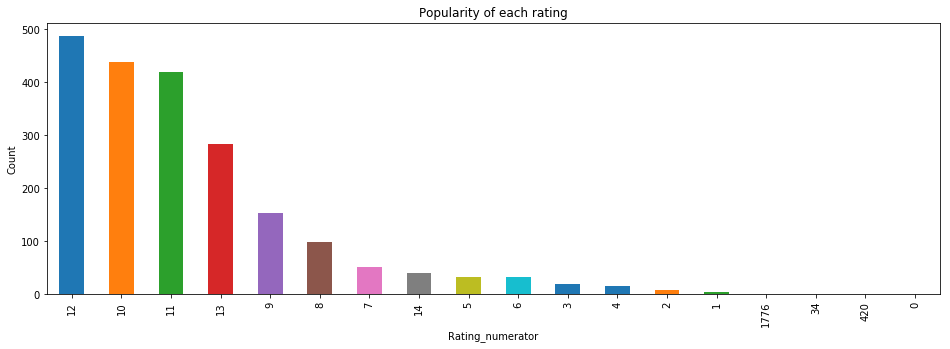

In [311]:
#Plotting the most common ratings
plt.figure(figsize=(16,5))
twitter_archive_master.rating_numerator.value_counts().sort_values(ascending=False).plot(kind='bar');
plt.title("Popularity of each rating");
plt.ylabel("Count");
plt.xlabel("Rating_numerator");

INSIGHT: 12 is the most common/popular rating over the period of the tweets with 490 tweets receiving a 12 rating

In [348]:
#Ratings against average favorite count
rating_favorite_corr = pd.DataFrame(twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.rating_numerator.isin([1776, 420])].index).groupby('rating_numerator')['favorite_count'].mean())

In [343]:
rating_favorite_corr

,favorite_count
rating_numerator,
0,20896.000000
1,6054.500000
2,2056.750000
3,1995.894737
4,2295.133333
5,2201.303030
6,2270.562500
7,2529.980392
8,2042.693878


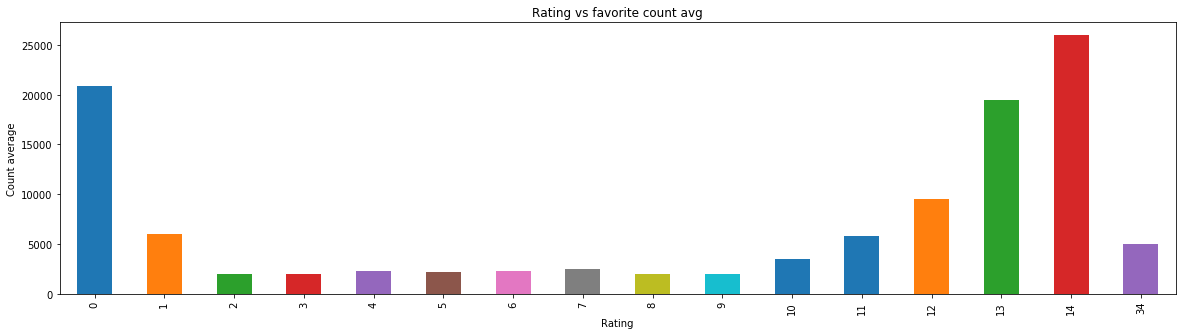

In [344]:
#Plotting ratings against average favorite count
plt.figure(figsize=(20,5))
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.rating_numerator.isin([1776, 420])].index).groupby('rating_numerator')['favorite_count'].mean().plot(kind='bar');
plt.title("Rating vs favorite count avg");
plt.ylabel("Count average");
plt.xlabel("Rating");

The two outermost ratings of 0 and 34 seem to have uncharacteristically high (in the case of 0) and uncharacteristically low (in the case of 34) favorite counts. A look at the enties for these ratings (below) will show that 34 was not a genuine rating but was just a normalisation of 24/7 which on reflection was probably not the right approach. The 0 rating on the other hand is not a 'real' rating but is a tweet bashing a plagiarism post.

In [347]:
#A look at the ratings for 0 and 34 that are out of place
twitter_archive_master[twitter_archive_master.rating_numerator.isin([0, 34])]

,tweet_id,year,month,day,weekday,hour,minute,text,rating_numerator,rating_denominator,favorite_count,retweet_count,name,stage,dog_type
1693,810984652412424192,2016,12,19,0,23,6,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,34,10,5033.0,1323.0,Sam,NaN,golden_retriever
1850,835152434251116546,2017,2,24,4,15,40,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10,20896.0,2754.0,NaN,NaN,American_Staffordshire_terrier


INSIGHT: Taking away the outliers that can be explained, the trend with the upper ratings (i.e., 9 to 14) seem to show an increase in the favorite count as the rating increases.

#### Trend of ratings over time

In [315]:
#Finding the trend of the ratings from 2015 to 2017
pd.DataFrame(twitter_archive_master.groupby(['year', 'month'])['rating_numerator'].mean())

rating_numerator
year month                  
2015 11            10.337838
     12             9.598383
2016 1             10.240437
     2             10.148760
     3             10.515152
     4             10.750000
     5             10.898305
     6             10.455556
     7             29.442105
     8             10.983333
     9             11.235294
     10            11.736111
     11            12.037037
     12            12.350877
2017 1             12.260870
     2             12.119403
     3             12.320000
     4             12.261905
     5             12.767442
     6             12.574468
     7             12.843137
     8             13.000000

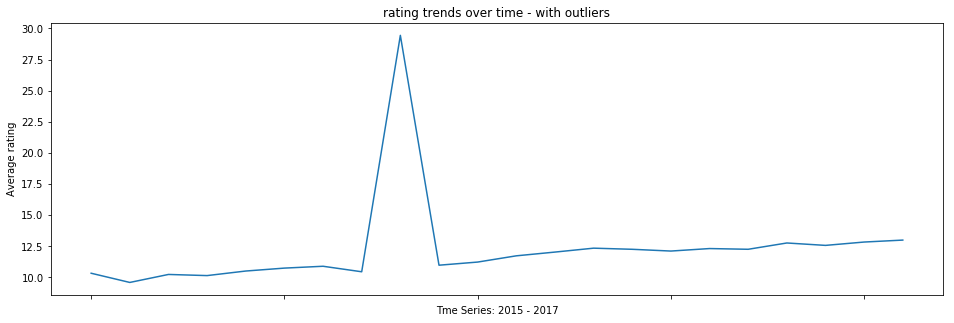

In [316]:
#Plotting the trend
#There is a weird spike on this line plot which I will investigate
plt.figure(figsize=(16,5))
twitter_archive_master.groupby(['year', 'month'])['rating_numerator'].mean().plot();
plt.title("rating trends over time - with outliers");
plt.ylabel("Average rating");
plt.xlabel("Tme Series: 2015 - 2017");

In [317]:
#Finding the two highest (Outlier) ratings in the data
twitter_archive_master[twitter_archive_master.rating_numerator.isin(twitter_archive_master.rating_numerator.nlargest(2))][['year', 'month', 'rating_numerator', 'dog_type']]

,year,month,rating_numerator,dog_type
275,2015,11,420,NaN
1326,2016,7,1776,NaN


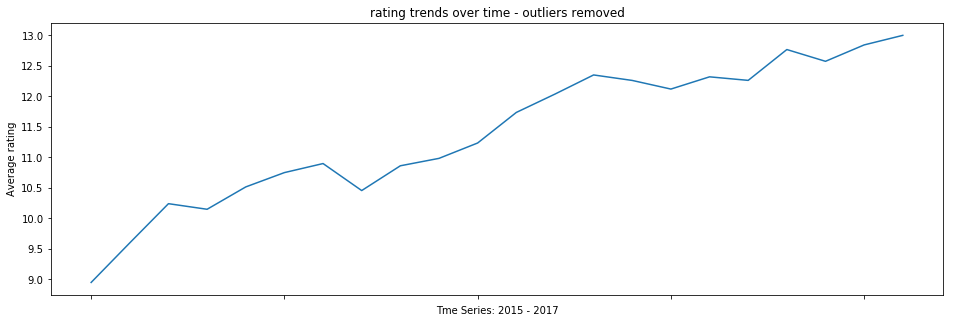

In [318]:
#Replotting the trend, this time EXCLUDING the two outliers
plt.figure(figsize=(16,5))
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.rating_numerator.isin([1776, 420])].index).groupby(['year', 'month'])['rating_numerator'].mean().plot();
plt.title("rating trends over time - outliers removed");
plt.ylabel("Average rating");
plt.xlabel("Tme Series: 2015 - 2017");

INSIGHT: The trend (without the 2 outliers) seems to suggest that the ratings have become generally more generous with time with a rising trend between 2015 and 20117.

#### Are there favourite times of the day that WeRateDogs tweet? Do they tweet 24/7?

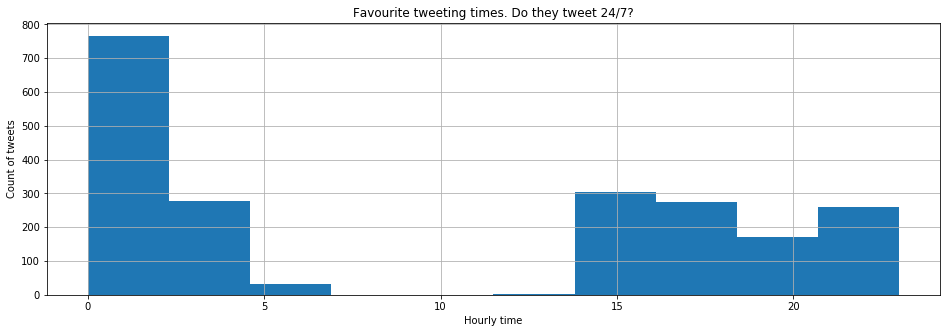

In [319]:
#Plotting the times that WeRateDogs normally tweet
plt.figure(figsize=(16,5))
twitter_archive_master.hour.hist();
plt.title("Favourite tweeting times. Do they tweet 24/7?");
plt.ylabel("Count of tweets");
plt.xlabel("Hourly time");

INSIGHT: WeRateDogs does not tweet 24/7. There are favourite hours for tweeting around 0000 Hrs GMT and very quiet hours between 0600hrs  and 1400 Hrs GMT. Without knowing the timezone they are tweeting from i can not speculate beyond this, but I can conclude that they do not tweet 24/7.

#### Average rating by dog stage

In [320]:
#Finding the average rating by dog stage
rating_by_stage = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.stage.isna()].index).groupby('stage')['rating_numerator'].mean()
rating_by_stage

stage
doggo      11.720000
floofer    11.800000
pupper     10.765487
puppo      12.041667
Name: rating_numerator, dtype: float64

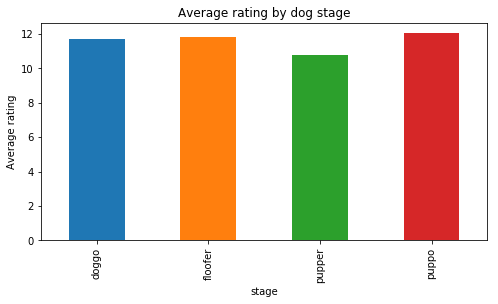

In [321]:
#Plotting the average rating by dog stage
plt.figure(figsize=(8,4))
rating_by_stage.plot(kind = 'bar');
plt.title("Average rating by dog stage");
plt.ylabel("Average rating");

INSIGHT: The puppo receives the highest average rating, and the pupper receives the lowest average rating of the dogs that have a dog stage stated

#### Average rating by dog type

In [322]:
#Finding the average rating by dog type
rating_by_dog_type = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.dog_type.isna()].index).groupby('dog_type')['rating_numerator'].mean().sort_values(ascending=False)
rating_by_dog_type

dog_type
Bouvier_des_Flandres              13.000000
Saluki                            12.500000
briard                            12.333333
Tibetan_mastiff                   12.250000
Border_terrier                    12.142857
standard_schnauzer                12.000000
silky_terrier                     12.000000
golden_retriever                  11.769231
Gordon_setter                     11.750000
Irish_setter                      11.750000
Samoyed                           11.731707
Australian_terrier                11.500000
wire-haired_fox_terrier           11.500000
Great_Pyrenees                    11.466667
Pembroke                          11.425532
chow                              11.416667
Eskimo_dog                        11.409091
Norfolk_terrier                   11.333333
Doberman                          11.333333
Greater_Swiss_Mountain_dog        11.333333
Irish_water_spaniel               11.333333
cocker_spaniel                    11.333333
Leonberg               

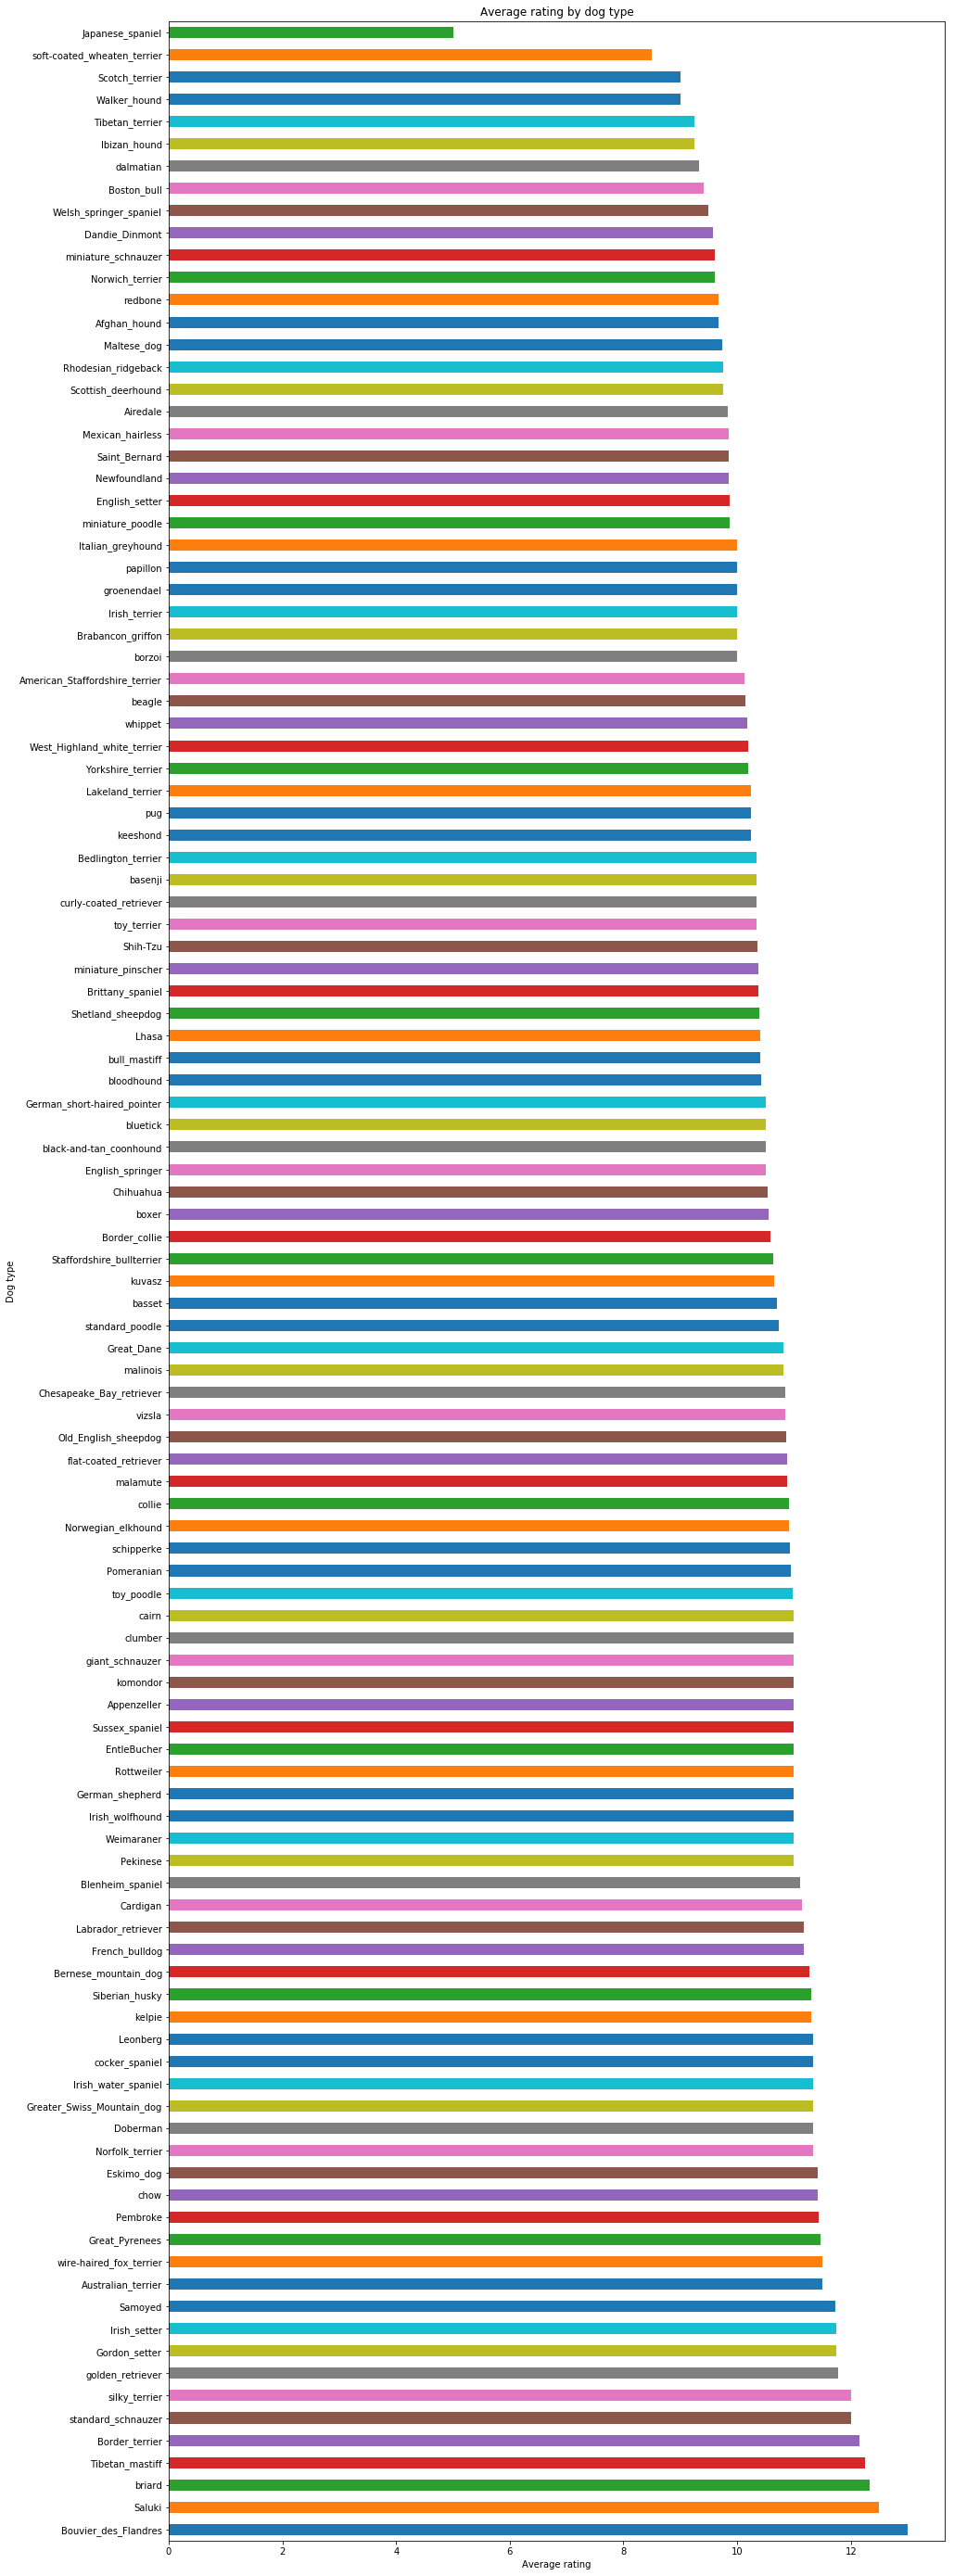

In [323]:
#Plotting the average rating by dog type
plt.figure(figsize=(15,50))
rating_by_dog_type.plot(kind = 'barh');
plt.title("Average rating by dog type");
plt.ylabel("Dog type");
plt.xlabel("Average rating");

INSIGHT: The Bouvier_des_flandres has the highest average rating of the dogs that have a dog_type stated

In [324]:
#Finding the average retweet_count by dog stage
retweet_count_by_stage = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.stage.isna()].index).groupby('stage')['retweet_count'].mean()
retweet_count_by_stage

stage
doggo      5469.266667
floofer    3262.600000
pupper     2003.044248
puppo      5835.750000
Name: retweet_count, dtype: float64

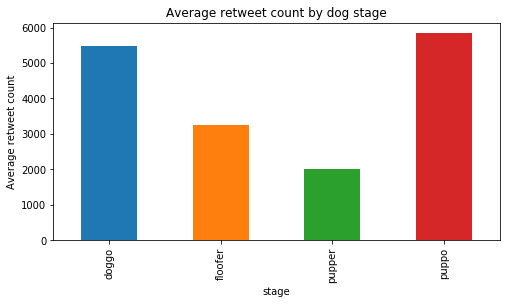

In [325]:
#Plotting the average retweet_count by dog stage
plt.figure(figsize=(8,4))
retweet_count_by_stage.plot(kind = 'bar');
plt.title("Average retweet count by dog stage");
plt.ylabel("Average retweet count");

In [326]:
#Finding the average favorite_count by dog type
favorite_count_by_dog_type = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.dog_type.isna()].index).groupby('dog_type')['favorite_count'].mean().sort_values(ascending=False)
favorite_count_by_dog_type

dog_type
Bedlington_terrier             21449.000000
Saluki                         20712.750000
French_bulldog                 17463.300000
Bouvier_des_Flandres           15293.000000
Afghan_hound                   14649.000000
black-and-tan_coonhound        14612.000000
flat-coated_retriever          14467.625000
Irish_water_spaniel            13913.666667
whippet                        12646.636364
Leonberg                       12606.333333
English_springer               12090.500000
standard_poodle                11917.181818
Samoyed                        11707.268293
cocker_spaniel                 11686.366667
Border_terrier                 11626.428571
Mexican_hairless               11553.000000
Eskimo_dog                     11012.863636
Cardigan                       10891.238095
golden_retriever               10757.000000
Lakeland_terrier               10739.352941
Great_Pyrenees                 10455.000000
Tibetan_mastiff                10231.250000
Weimaraner             

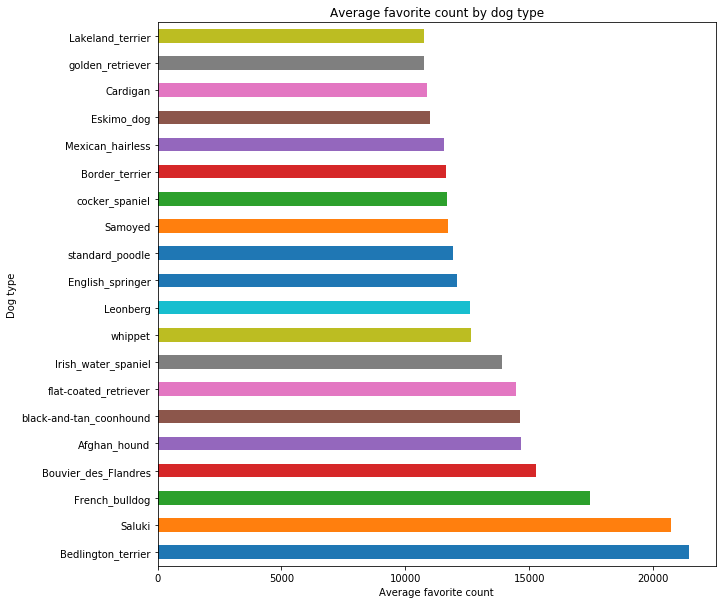

In [352]:
#Plotting the favorite count by dog type
plt.figure(figsize=(10,10))
favorite_count_by_dog_type[:20].plot(kind = 'barh');
plt.title("Average favorite count by dog type");
plt.ylabel("Dog type");
plt.xlabel("Average favorite count");

INSIGHT: The Bedlington terrier has the highest number of average favorite counts

### The end...